In [15]:
from dotenv import load_dotenv
load_dotenv()

True

In [19]:
from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="gpt-4o",temperature=0)

In [20]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage, RemoveMessage
from langgraph.graph import MessagesState, StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI

class State(MessagesState):
    summary: str
def call_model(state: State):
    summary = state.get("summary", "")

    if summary:
        system_message = f"Previous conversation summary: {summary}"
        messages = [SystemMessage(content=system_message)] + state["messages"]
    else:
        messages = state["messages"]

    response = model.invoke(messages)
    return {"messages": response}

def summarize_conversation(state: State):
    summary = state.get("summary", "")

    if summary:
        summary_message = (
            f"Current summary: {summary}\n\n"
            "Update this summary with the new messages above:"
        )
    else:
        summary_message = "Create a brief summary of this conversation:"

    messages = state["messages"] + [HumanMessage(content=summary_message)]
    response = model.invoke(messages)

    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]

    return {"summary": response.content, "messages": delete_messages}

def should_continue(state: State):
    messages = state["messages"]

    if len(messages) > 4:
        return "summarize_conversation"

    return END


In [21]:
# Build the graph
workflow = StateGraph(State)
workflow.add_node("conversation", call_model)
workflow.add_node("summarize_conversation", summarize_conversation)

workflow.add_edge(START, "conversation")
workflow.add_conditional_edges("conversation", should_continue)
workflow.add_edge("summarize_conversation", END)

# Add memory to persist conversations
memory = MemorySaver()
graph = workflow.compile(checkpointer=memory)


In [22]:
# Create a thread
config = {"configurable": {"thread_id": "tech-support-1"}}

# Start conversation
input_message = HumanMessage(content="Hi, I'm having issues with my laptop")
output = graph.invoke({"messages": [input_message]}, config)
for m in output['messages'][-1:]:
    m.pretty_print()

input_message = HumanMessage(content="It's running very slow")
output = graph.invoke({"messages": [input_message]}, config)
for m in output['messages'][-1:]:
    m.pretty_print()

input_message = HumanMessage(content="I have 8GB RAM and Windows 10")
output = graph.invoke({"messages": [input_message]}, config)
for m in output['messages'][-1:]:
    m.pretty_print()

input_message = HumanMessage(content="Yes, I've tried restarting it")
output = graph.invoke({"messages": [input_message]}, config)
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

I'm sorry to hear that you're having issues with your laptop. Could you provide more details about the problem you're experiencing? This will help me assist you better.
================================== Ai Message ==================================

A slow laptop can be frustrating, but there are several steps you can take to try to improve its performance. Here are some suggestions:

1. **Restart Your Laptop**: Sometimes, a simple restart can resolve performance issues by clearing temporary files and freeing up system resources.

2. **Check for Malware**: Run a full system scan using your antivirus software to check for malware or viruses that could be slowing down your laptop.

3. **Close Unnecessary Programs**: Open the Task Manager (Ctrl + Shift + Esc) and check for any programs that are using a lot of resources. Close any that you don't need running.

4. **Disable Startup Programs**: Some programs s

In [23]:
summary = graph.get_state(config).values.get("summary", "")
print(summary)

The user is experiencing slow performance on their laptop, which has 8GB of RAM and runs Windows 10. I provided several troubleshooting steps, including restarting the laptop, checking for malware, closing unnecessary programs, disabling startup programs, freeing up disk space, updating the operating system and drivers, adjusting power settings, and considering hardware upgrades like adding an SSD. Additionally, I suggested optimizing Windows performance settings, managing background processes, checking disk usage, and using Windows troubleshooting tools. If the problem persists, consulting a professional technician was recommended.


In [24]:
input_message = HumanMessage(content="What should I check next?")
output = graph.invoke({"messages": [input_message]}, config)
for m in output['messages'][-1:]:
    m.pretty_print()

================================== Ai Message ==================================

If you've already tried the basic troubleshooting steps and your laptop is still running slow, here are some additional areas to investigate:

1. **Check for Resource-Intensive Applications**:
   - Open Task Manager (Ctrl + Shift + Esc) and look at the "Processes" tab to identify any applications that are using a lot of CPU, memory, or disk resources. Consider closing or uninstalling any unnecessary applications.

2. **Examine Event Viewer for Errors**:
   - Open Event Viewer by typing "eventvwr" in the Run dialog (Win + R).
   - Check the "Windows Logs" under "System" and "Application" for any critical errors or warnings that might indicate underlying issues.

3. **Inspect Network Activity**:
   - Sometimes, slow performance can be related to network issues. Check if any applications are using excessive network bandwidth in Task Manager under the "Network" column.

4. **Check for Windows Corruption**:
  

In [25]:
summary = graph.get_state(config).values.get("summary", "")
print(summary)

The user is experiencing slow performance on their laptop, which has 8GB of RAM and runs Windows 10. Initial troubleshooting steps included restarting the laptop, checking for malware, closing unnecessary programs, disabling startup programs, freeing up disk space, updating the operating system and drivers, adjusting power settings, and considering hardware upgrades like adding an SSD. Additional suggestions included optimizing Windows performance settings, managing background processes, checking disk usage, and using Windows troubleshooting tools.

Further steps involved checking for resource-intensive applications using Task Manager, examining Event Viewer for errors, inspecting network activity, and running the System File Checker tool to repair corrupted system files. The user was also advised to check for BIOS or firmware updates, monitor the laptop's temperature to prevent overheating, and run the Windows Memory Diagnostic tool to check for RAM issues. Reviewing installed softwar

### LANGSMITH PORTAL

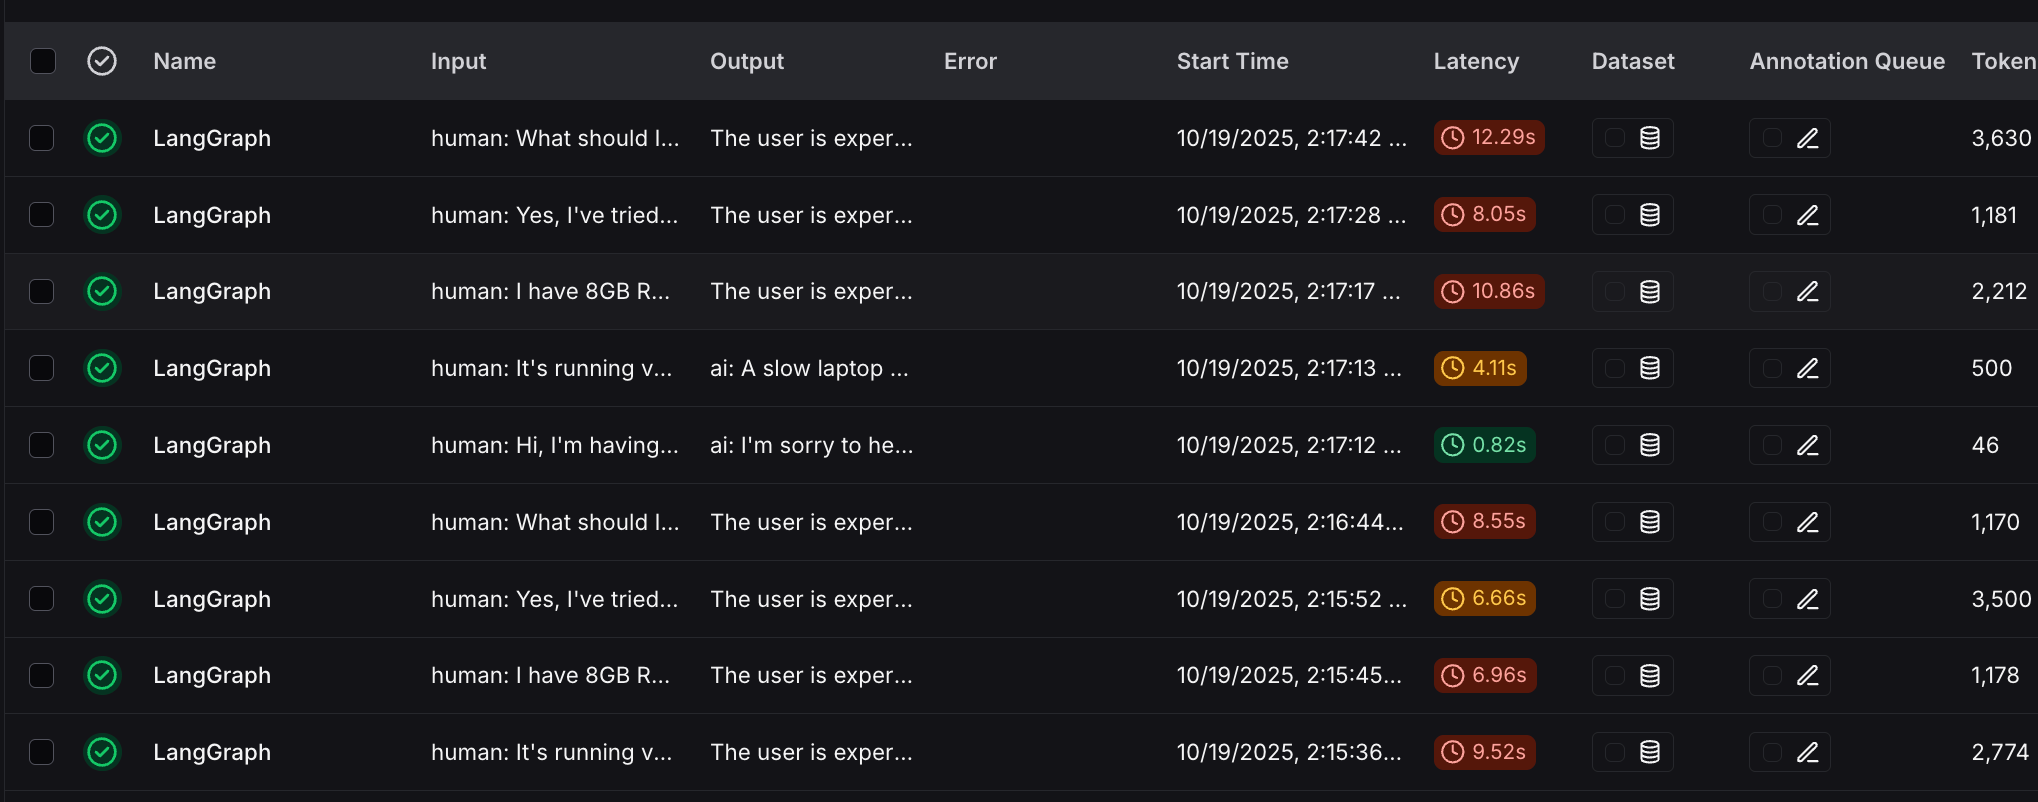

call to the llm without summary as context

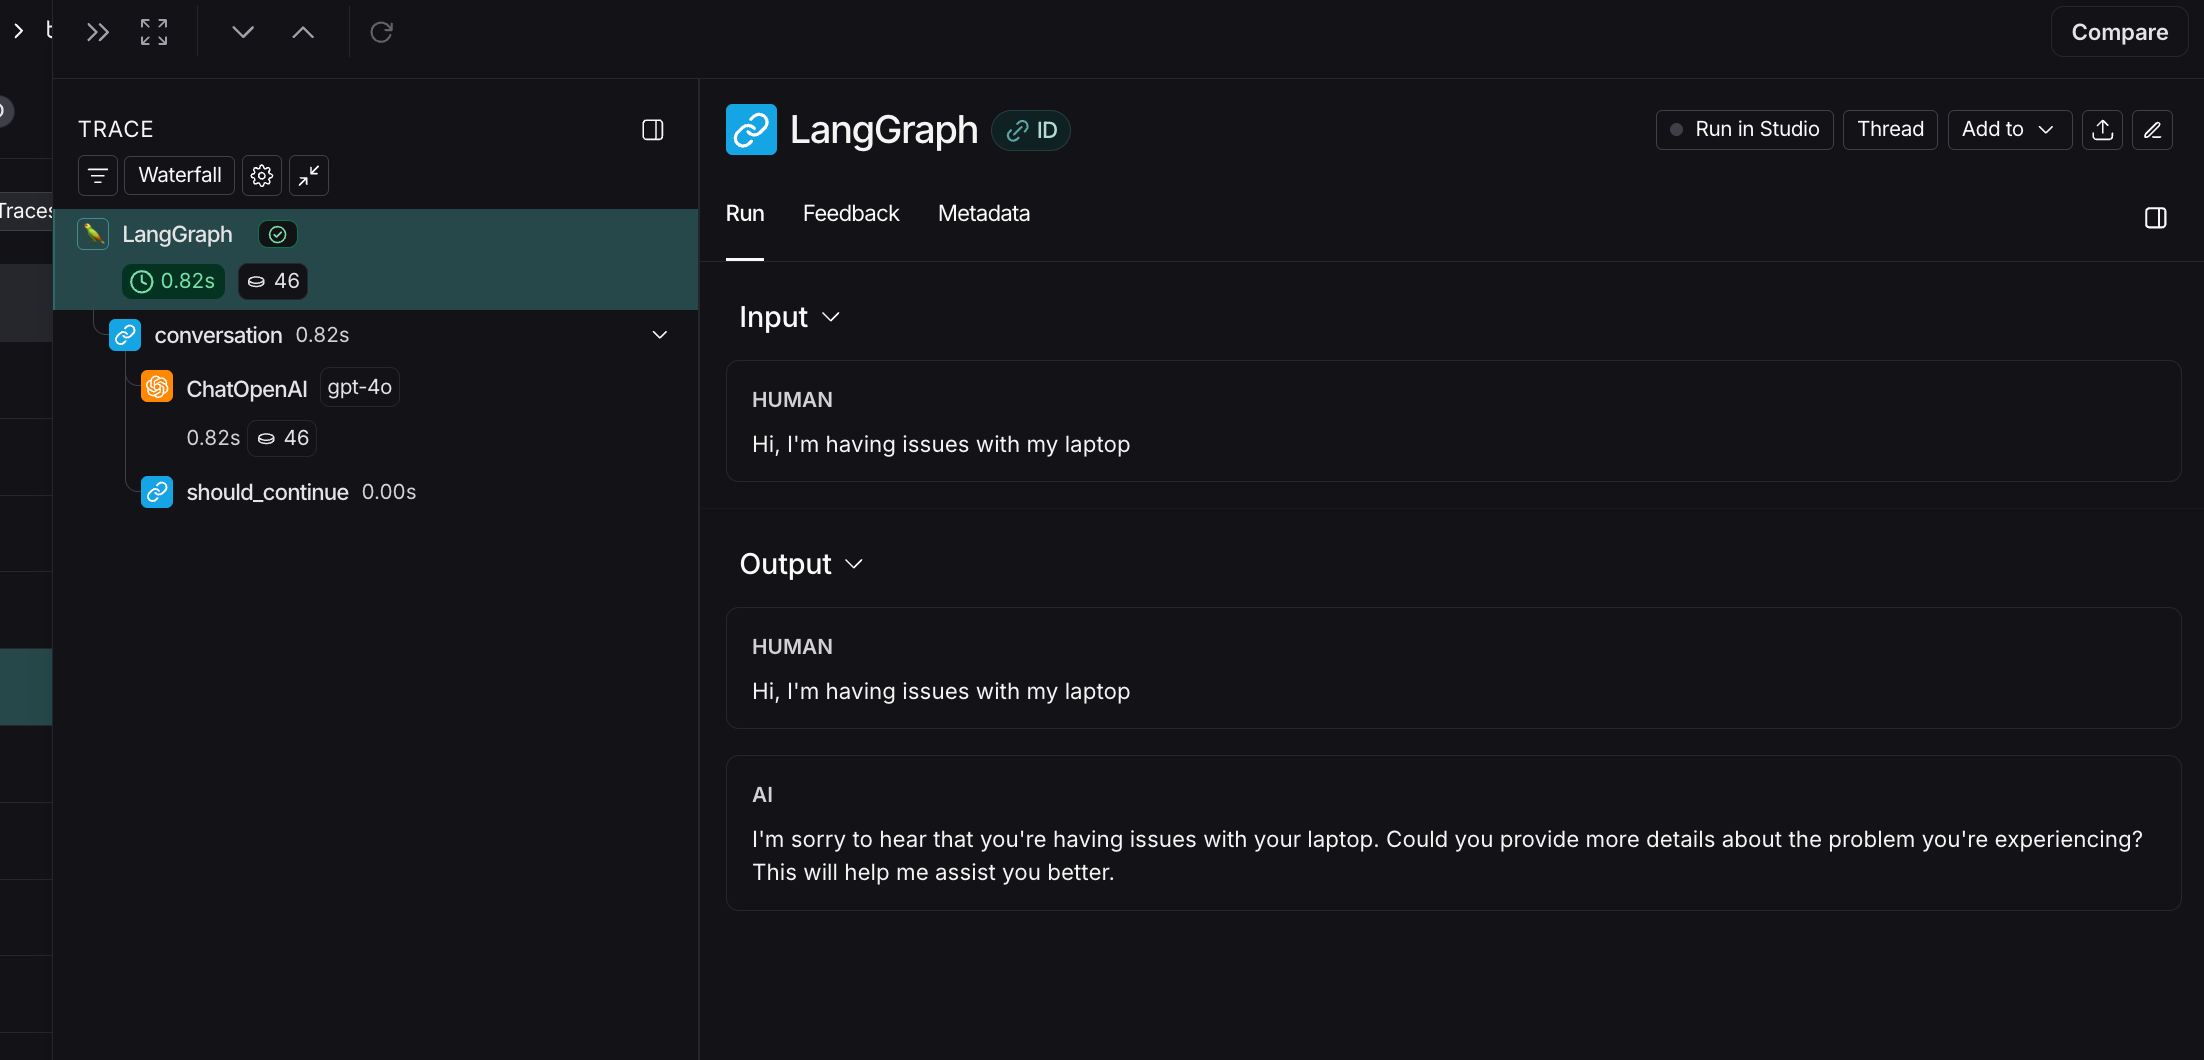

Call to the llm with summary as context

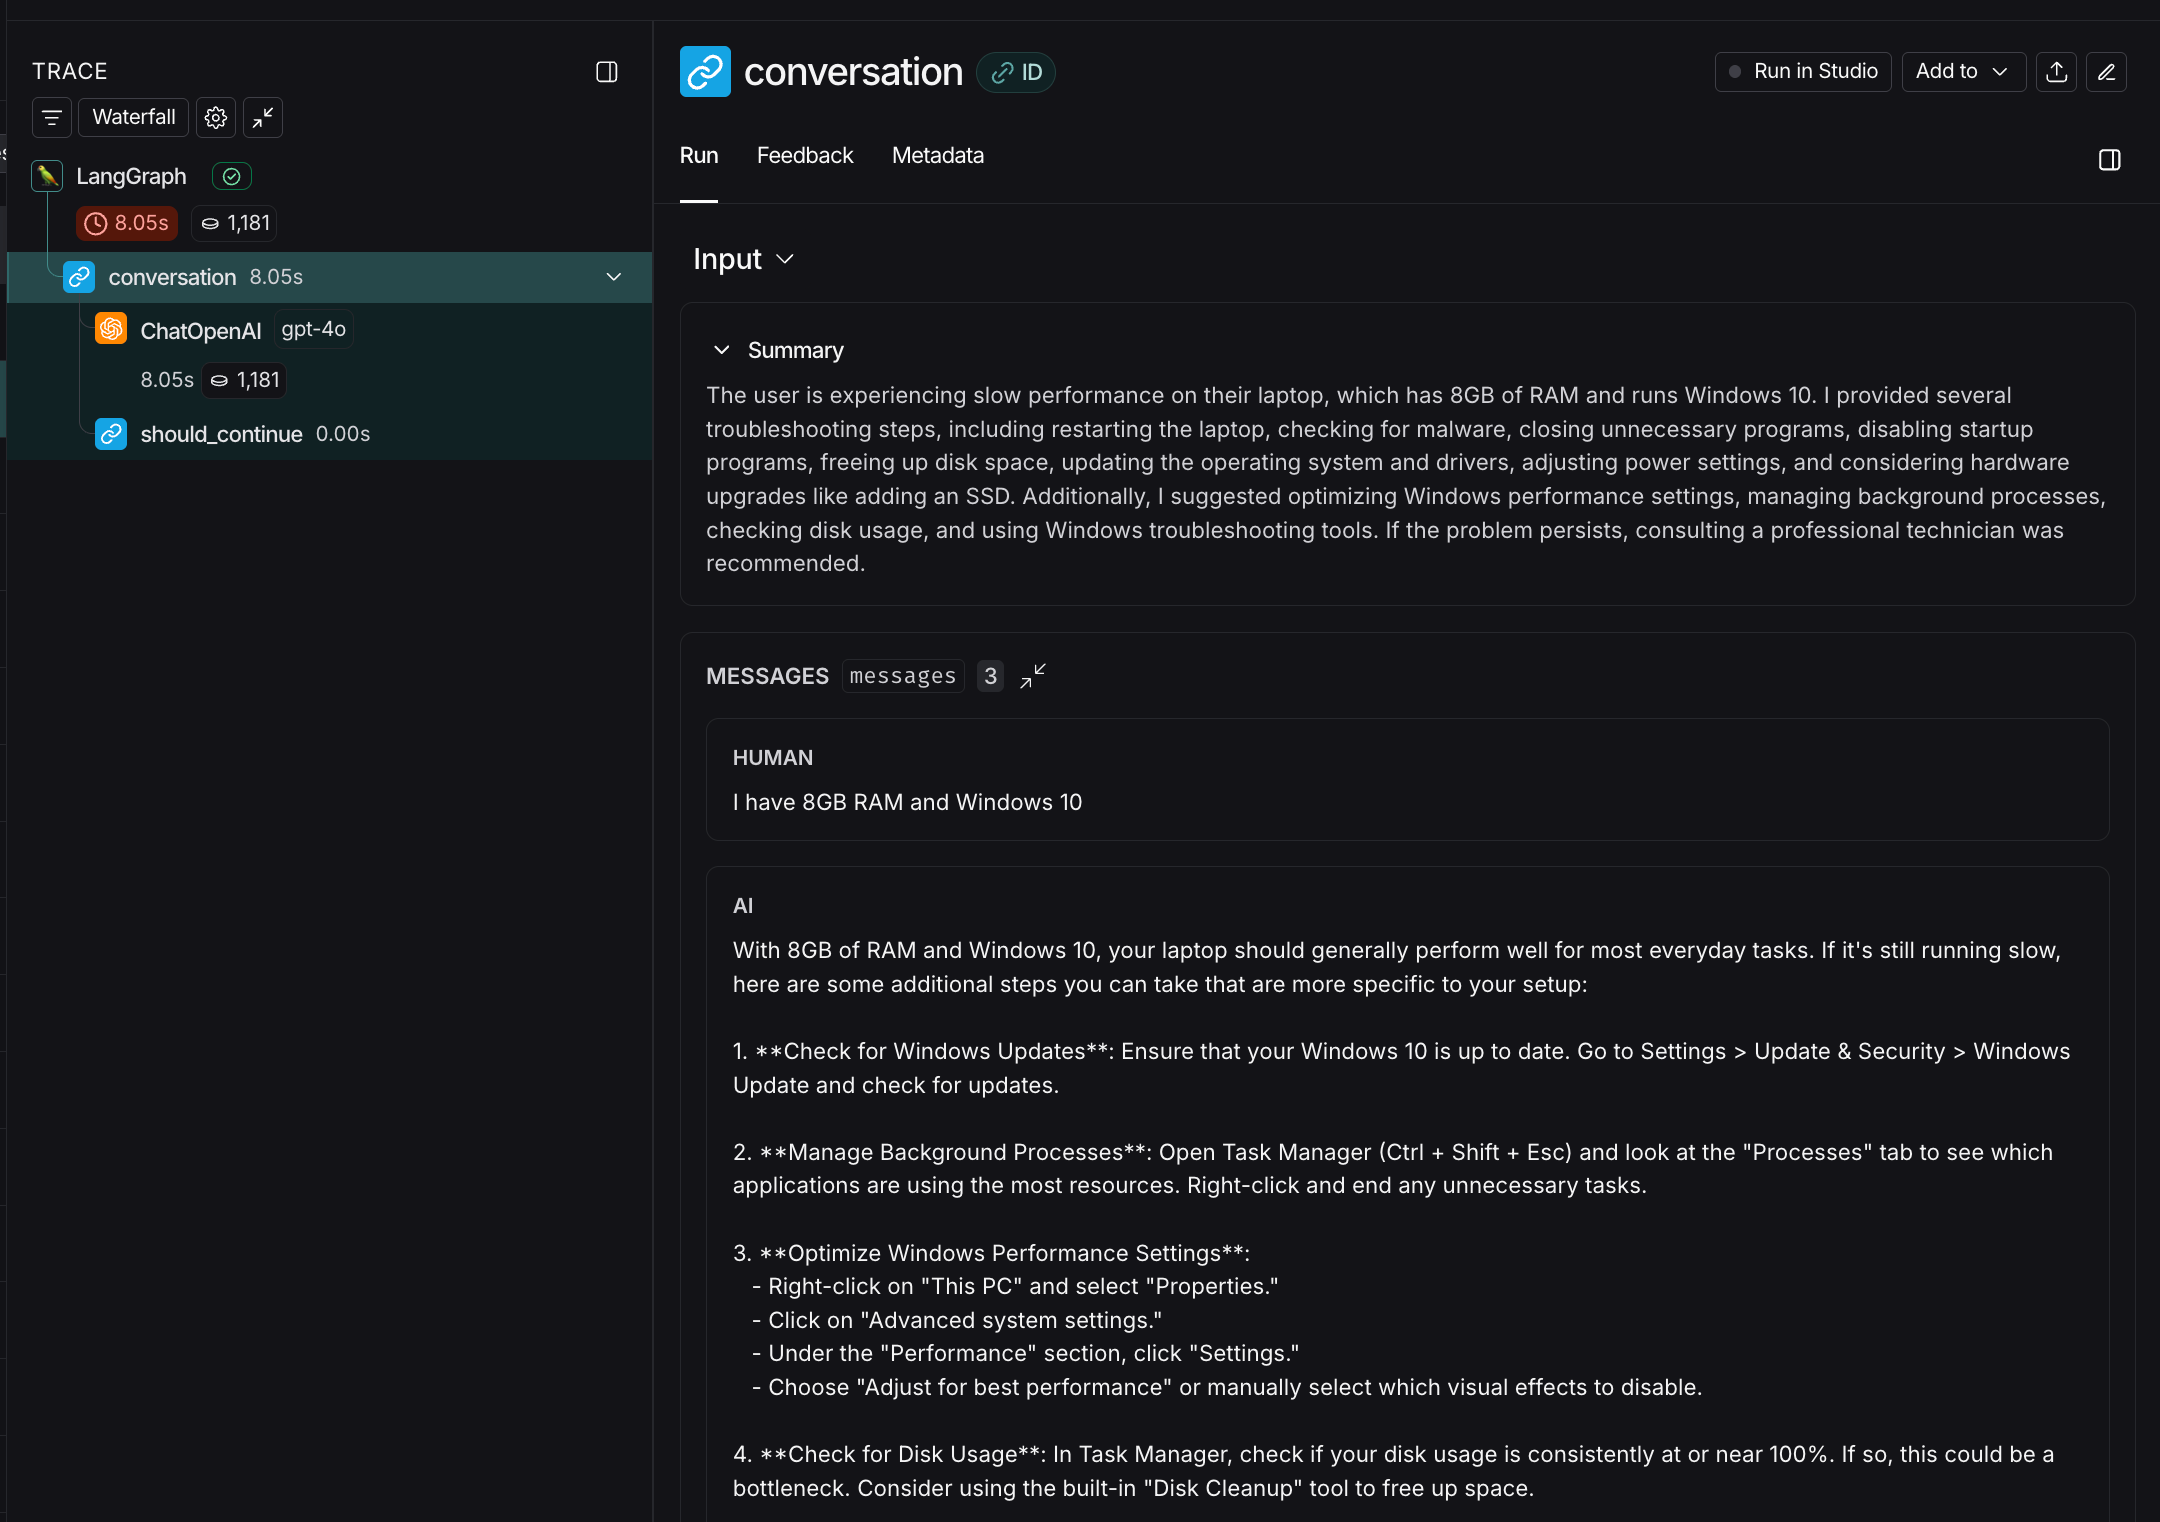


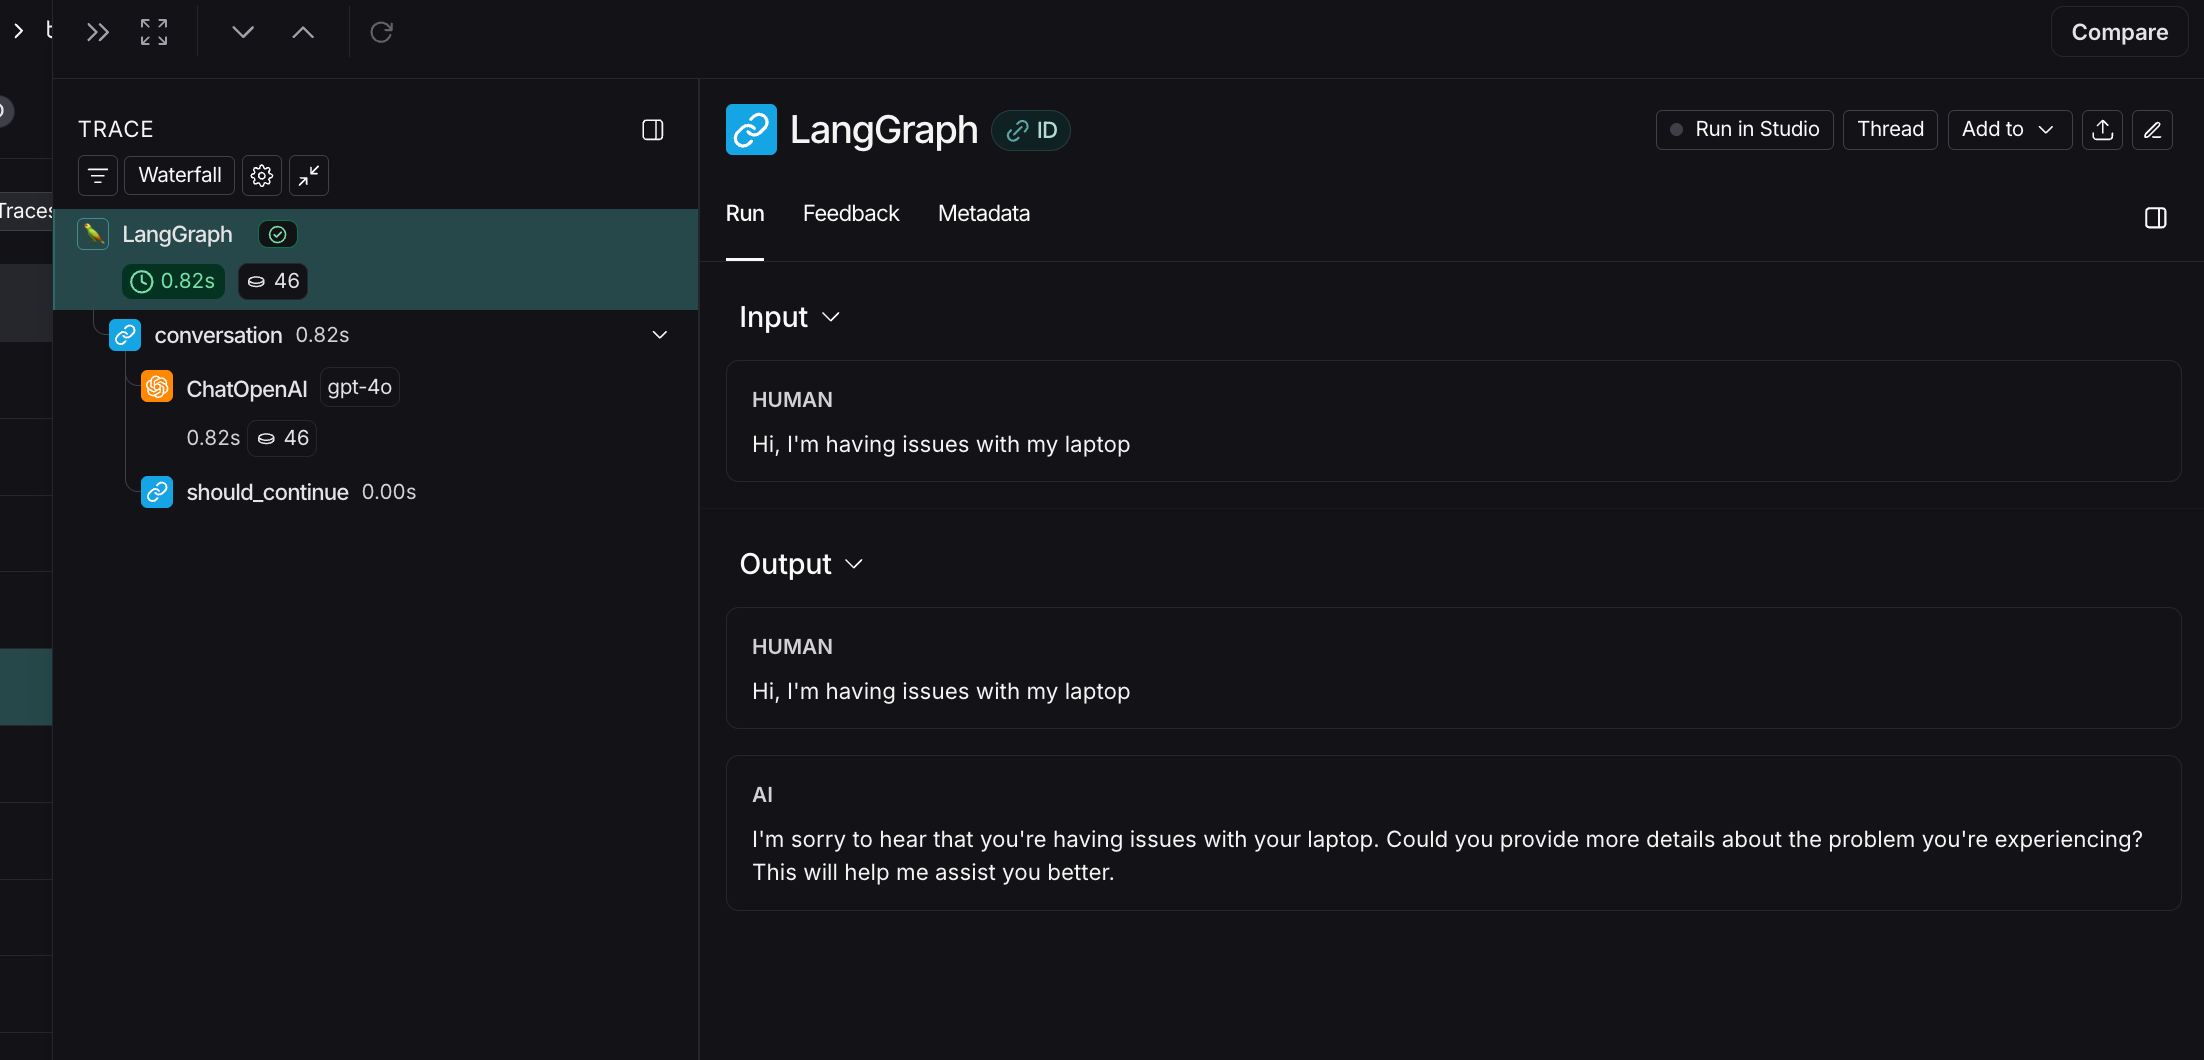